# Destek Vektör(Support Vector Regression)

**Regresyon amacıyla kullanırsak:**

**Maksimum noktayı içerisine alan marjin aralığını çizmemiz gerekiyor.**

**Aynı marjin aralığında farklı eğimlerle, farklı noktalardan birden çok doğru çizilebilir. Bu doğrulardan hangisi maksimum marjin aralığını sağlar?**

**Bu marjin aralığının dışında kalan noktalar ise bizim tahminde kullanamayacağımız noktalar, yani hata olarak kabul edeceğiz.**

**Öyle bir doğru çizeceğiz ki, marjin değerini minimize edecek. Amacımız bu!**

**Ortadan çizeceğimiz şey bir doğru olmak zorunda değildir! -Doğrusal olmayan SVR olabilir, -y=ax+b formülünde x yerine kernel function adı verilen, başka bir fonksiyon ekleyebiliriz. K(xi, x) ile gösterilir. Bu K bir polinom olabilir, gauss fonksiyonu olabilir... vb.**

**Doğru, Polinom, RBF fonksiyonlar(başka fonksiyonlar da olabilir) ele alırız. Bize en doğru sonucu vereni kullanırız!**

## Destek Vektör Makineleri(SVM ALGORİTMASI):

**Sınıflandırma amacıyla kullanırsak:**

**İki farklı sınıfı iki bölmeye ayırıyoruz. Biri üst tarafta diğeri alt tarafta kalacak şekilde ve aralarından bir doğru çiziyoruz.**

**Destek vektör ise bu doğruyu nasıl çizmeliyiz? İki sınıf arasındaki marjin aralığı ne kadar olursa bizim için daha doğru bir sonuç ortaya çıkar? bunların cevabını verir.**

**İki sınıfın birbirine en yakın noktalarından oluşabilecek en uzak doğruyu çizmemiz gerekiyor. Bu marjin aralığında bir nokta olmayacak!**

**SVR outlier(aykırı) verilere karşı hassasiyeti var. Ondan bu regresyonu kullanırken dikkat etmemiz gereken noktalardan biri scaler'i kullanmak zorunda olduğumuz!**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [6]:
data = pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [47]:
x = data.iloc[:, 1:2]
y = data.iloc[:, -1:]

In [54]:
#Öncelikle zorunda olduğumuz ölçekleme işini yapıyoruz
#scale edilirken orta değeri 0 olarak alır.
#bizim şu anki değerimiz -1.5-2 arası(yaklaşık)
sc = StandardScaler()
X_olcek = sc.fit_transform(x)
sc2 = StandardScaler()

#Y_olcek = sc.fit_transform(y) //böyle de sonucu verir ancak böyle bir hata verir:
    #DataConversionWarning: A column-vector y was passed when a 1d array was expected.

#yapmamız gereken y'yi np.ravel() ile reshape etmek (1, 10) iken (10, 1) yapmak
#np.ravel() ile yapmamızın sebebi: bir df oluşturduk. df reshape edilemez. Ondan önce dizi haline getirmemiz gerek

Y_olcek = np.ravel(sc.fit_transform(y))

print(X_olcek)
print("\n\n", Y_olcek)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


 [-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


# RBF FORMÜLÜ

\begin{equation*}
k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)
\end{equation*}

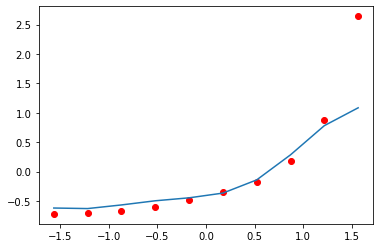

In [55]:
#şimdi ise svr oluşturuyoruz
#kernel'a verdiğimiz değere göre bir svr oluşturacak(polinom, lineer, rbf... gibi)
svr = SVR(kernel='rbf')
svr.fit(X_olcek, Y_olcek)


plt.scatter(X_olcek, Y_olcek, color='red')
plt.plot(X_olcek, svr.predict(X_olcek))

In [56]:
#şimdi ise spesifik değerlere bakalım
print(svr.predict([[11]]))
print(svr.predict([[6.6]]))

[0.01150915]
[0.01150915]
